<a href="https://colab.research.google.com/github/SnehaTanwar006/MNIST_with_CNN/blob/main/MNIST_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using MNIST dataset

Configure New notebook with GPU

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_labels.shape

(60000,)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
#ANN
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8706 - loss: 0.4467
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9653 - loss: 0.1174
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9787 - loss: 0.0719
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9847 - loss: 0.0520
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9892 - loss: 0.0377


In [ ]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


array([4.8383139e-08, 4.3287867e-09, 1.4927353e-05, 3.8393380e-04,
       3.0723542e-11, 6.1789102e-08, 1.1722416e-12, 9.9958605e-01,
       2.4326286e-07, 1.4636203e-05], dtype=float32)

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9774 - loss: 0.0843
test_acc: 0.9799000024795532


CNN

In [ ]:
#CNN
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(28, 28, 1))#(shape=(img height,width,channels))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        11,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,202 (407.04 KB)

 Trainable params: 104,202 (407.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 51s 53ms/step - accuracy: 0.8868 - loss: 0.3640
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 85s 57ms/step - accuracy: 0.9853 - loss: 0.0472
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 55ms/step - accuracy: 0.9905 - loss: 0.0317
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 54ms/step - accuracy: 0.9924 - loss: 0.0235
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 53ms/step - accuracy: 0.9947 - loss: 0.0172


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9893 - loss: 0.0322
Test accuracy: 0.992


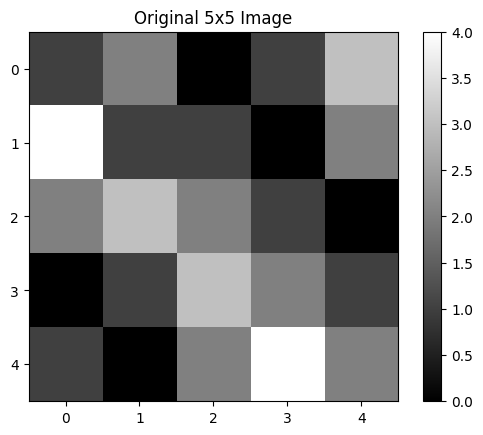

Input image:
 [[1. 2. 0. 1. 3.]
 [4. 1. 1. 0. 2.]
 [2. 3. 2. 1. 0.]
 [0. 1. 3. 2. 1.]
 [1. 0. 2. 4. 2.]]


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# 5x5 single-channel image (values 0-9)
img = np.array([
    [1, 2, 0, 1, 3],
    [4, 1, 1, 0, 2],
    [2, 3, 2, 1, 0],
    [0, 1, 3, 2, 1],
    [1, 0, 2, 4, 2]
], dtype=np.float32)

plt.imshow(img, cmap='gray')
plt.title('Original 5x5 Image')
plt.colorbar()
plt.show()
print("Input image:\n", img)

In [ ]:
# 3x3 filter
kernel = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
], dtype=np.float32)
print("Kernel (Filter):\n", kernel)

Kernel (Filter):
 [[ 1.  0. -1.]
 [ 1.  0. -1.]
 [ 1.  0. -1.]]
